# import package

In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder   # for convert catogrical data to no 
import pandas as pd
import numpy as np
import seaborn as sns
import random
import utils

# import data 

In [3]:
#data =pd.read_csv("train.csv")
#data
data = pd.read_csv('train.csv')
data

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


# Expolatort data analysis (EDA)

In [4]:
data['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

In [5]:
data.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
10829    False
10830    False
10831    False
10832    False
10833    False
Length: 10834, dtype: bool>

In [6]:
data.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [ ]:
# sns.pairplot(data,hue="y")

In [7]:
data['y'].value_counts(normalize=True)

DERMASON    0.261861
SIRA        0.194665
SEKER       0.149622
HOROZ       0.137345
CALI        0.120362
BARBUNYA    0.097563
BOMBAY      0.038582
Name: y, dtype: float64

In [8]:
data.values

array([[0, 58238, 971.303, ..., 0.4699939717666177, 0.9985950088358464,
        'HOROZ'],
       [1, 44515, 757.6010000000001, ..., 0.8035104366666684,
        0.9973699821378832, 'SEKER'],
       [2, 31662, 653.7830000000001, ..., 0.7004532870310671,
        0.9977374579620564, 'DERMASON'],
       ...,
       [10831, 81837, 1095.937, ..., 0.5536104367878766,
        0.9944118926806816, 'CALI'],
       [10832, 48212, 826.3620000000002, ..., 0.640254526594677,
        0.9947926877983206, 'SIRA'],
       [10833, 28026, 610.943, ..., 0.7687622900307359,
        0.9993171271748076, 'DERMASON']], dtype=object)

In [9]:
le = LabelEncoder()    # CONVERT CATOGRICAL ("Y") TO NO
y = le.fit_transform(data['y'])
print(y[10])
data['y'].head(20)
y

0


array([4, 5, 3, ..., 2, 6, 3])

In [10]:
features = np.array(data.drop(columns=['y'] ,axis=1).values)
labels=np.array(data['y'].values)

In [ ]:
data.shape[0]

In [ ]:
# sns.relplot(data=data)

In [ ]:
# corrMatrix = data.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.savefig('foo.png')
# plt.show()

In [ ]:
data.corr()

In [ ]:
data.isnull()

In [ ]:
result = data.isna().sum(axis=0)
result[result!=0]

In [ ]:
data.info()

# Data Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(features, labels, test_size = 0.3, random_state = 42)

# modeling

# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing  #FOR Normaize
X_train=preprocessing.scale(X_train)
X_validation=preprocessing.scale(X_validation)
clf = LogisticRegression()
clf.fit(X_train, y_train)


C:\Users\sawsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print("Scores of the model")
print("Logistic regression:", clf.score( X_validation, y_validation))

Scores of the model
Logistic regression: 0.9246385727468471


In [17]:
# Store predicted class labels of X
prediction = clf.predict(X_validation)

# Prints the predicted class labels of X
print(prediction)


['DERMASON' 'CALI' 'DERMASON' ... 'SEKER' 'CALI' 'CALI']


# K-NEAREST NEIGHBORS IN SCIKIT-LEARN.

In [37]:

from sklearn.neighbors import KNeighborsClassifier

# Declare an of the KNN classifier class with the value with neighbors.
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model with training data and target values
knn.fit(X_train, y_train)
print("Scores of the model")
print("knn:", knn.score( X_validation, y_validation))

Scores of the model
knn: 0.9154106428791141


In [59]:
# Store predicted class labels of X
prediction = knn.predict(X_validation)

# Prints the predicted class labels of X
print(prediction)

['DERMASON' 'CALI' 'DERMASON' ... 'SIRA' 'CALI' 'BARBUNYA']


# TEST STEP 

In [54]:
test = pd.read_csv('test .csv')
#test=preprocessing.scale(test)
test

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


In [55]:
id=list(test['ID'])

In [56]:
test=preprocessing.scale(test)


# knn prediction

In [57]:

prediction = knn.predict(test)
print(prediction)

['HOROZ' 'DERMASON' 'BARBUNYA' ... 'HOROZ' 'DERMASON' 'SIRA']


In [58]:

pred= pd.DataFrame()
pred['ID']=id
pred['y']=prediction
pred

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [59]:
pred['y'].value_counts()

DERMASON    713
SIRA        551
SEKER       395
HOROZ       360
CALI        338
BARBUNYA    248
BOMBAY      104
Name: y, dtype: int64

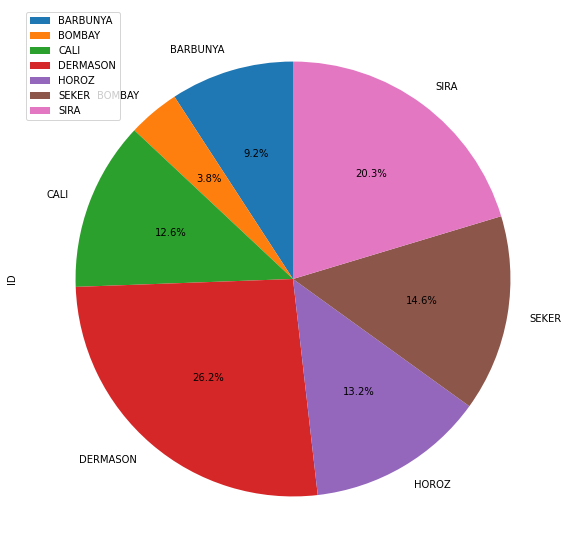

In [77]:
pred.groupby(['y']).sum().plot(kind='pie',startangle=90,figsize=(15,10),subplots=True, autopct='%1.1f%%')
plt.show()

# Export and submission data

In [60]:
pred.to_csv('subcb.csv',index=False)

In [ ]:
#  LogisticRegression Prediction

In [71]:
#prediction2 = clf.predict(test)
#print(prediction2)

In [72]:
#pred2= pd.DataFrame()
#pred2['ID']=id
#pred2['y']=prediction2
#pred2

In [73]:
#pred2['y'].value_counts()

In [74]:
#pred2.groupby(['y']).sum().plot(kind='pie',startangle=90,figsize=(15,10),subplots=True, autopct='%1.1f%%')

In [64]:
#pred2.to_csv('subcb.csv',index=False)